In [127]:
import networkx as nx 
import pandas as pd 
import numpy as np
  
df = pd.read_csv('extradata/linksNetwork.csv', delim_whitespace = True,  
                   header = None, names =['n1', 'n2', 'weight']) 
  
# G = nx.from_pandas_edgelist(df, 'n1', 'n2', edge_attr ='weight') 
  
# The Graph diagram does not show the edge weights.  
# However, we can get the weights by printing all the 
# edges along with the weights by the command below 
G = nx.DiGraph()
G.add_weighted_edges_from([tuple(x) for x in df.values])
# G.nodes()
# print(list(G.edges(data = True))) 

NodeView(('MediaNarodoweMN', 'medianarodowe.com', 'niezaleznapl', 'niezalezna.pl', 'RepublikaTV', 'twitter.com', 'www.youtube.com', 'telewizjarepublika.pl', 'wPrawopl', 'wprawo.pl', 'wSensie', 'wsensie.pl', 'medialne', 'centrummedialne.pl', 'dlapolski', 'rozmowy.eu', 'www.dlapolski.pl', 'Matka_Kurka', 'www.kontrowersje.net', 'Interia_Fakty', 'fakty.interia.pl', 'bankier_pl', 'www.bankier.pl', 'Bankier.pl', 'WiadomosciTVP', 'wiadomosci.tvp.pl', 'wgospodarce', 'wgospodarce.pl', 'KRESYPL', 'kresy.pl', 'natematpl', 'natemat.pl', 'FaktyTVN', 'fakty.tvn24.pl', 'go.tvn24.pl', 'rzeczpospolita', 'www.rp.pl', 'OnetWiadomosci', 'wiadomosci.onet.pl', 'tvp_info', 'www.tvp.info', 'tvp.info', 'tvn24', 'tvn24.pl', 'gazeta_wyborcza', 'wyborcza.pl', 'gazetapl_news', 'wiadomosci.gazeta.pl', 'konkret24', 'konkret24.tvn24.pl', 'oko_press', 'oko.press'))

In [90]:
junk = ['medialne','CrowdMedia_PL','dlapolski','Matka_Kurka','MediaNarodoweMN','niezaleznapl','PikioPL','RepublikaTV','wPrawopl','wSensie']
mainstream = ['wgospodarce','KRESYPL','bankier_pl','WiadomosciTVP','FaktyTVN','rzeczpospolita','OnetWiadomosci','Interia_Fakty','RadioZET_NEWS','natematpl','tvp_info','tvn24','gazeta_wyborcza','gazetapl_news']
factcheck = ['DemagogPL','konkret24','oko_press','demaskator24','AntyFakePL']
all_accounts = np.concatenate([junk, mainstream, factcheck])
val_map = {}
color_map = []

for node in G.nodes():
    if node in junk:
        val_map[node] = 1
        color_map.append('orange')
    elif node in mainstream:
        val_map[node] = 2
        color_map.append('lightblue')
    elif node in factcheck:
        val_map[node] = 3
        color_map.append('greenyellow')
    else:
        val_map[node] = 4
        color_map.append('lightgray')



In [125]:
common = ["www.youtube.com", "twitter.com"]
y = 1.
for account in all_accounts:
    y-=0.05
    pos[account] = [0. ,  y]
    for edge in G.edges(account):
        if edge[1]  not in common:
            pos[edge[1]] = [0.25 , y]
            y-=0.25
pos["www.youtube.com"] = [-0.25, -1.]
pos["twitter.com"] = [-0.25, -3.]

temp1 = pos["rzeczpospolita"]
temp2 = pos["www.rp.pl"]
pos["rzeczpospolita"]=pos["tvn24"]
pos["www.rp.pl"]=pos["tvn24.pl"]
pos["tvn24"]=temp1
pos["tvn24.pl"]= temp2
pos["go.tvn24.pl"] = [pos["fakty.tvn24.pl"][0], pos["fakty.tvn24.pl"][1]-0.25]

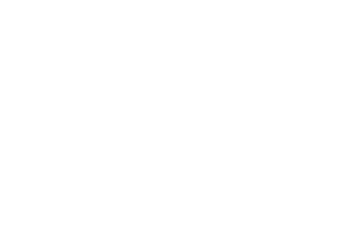

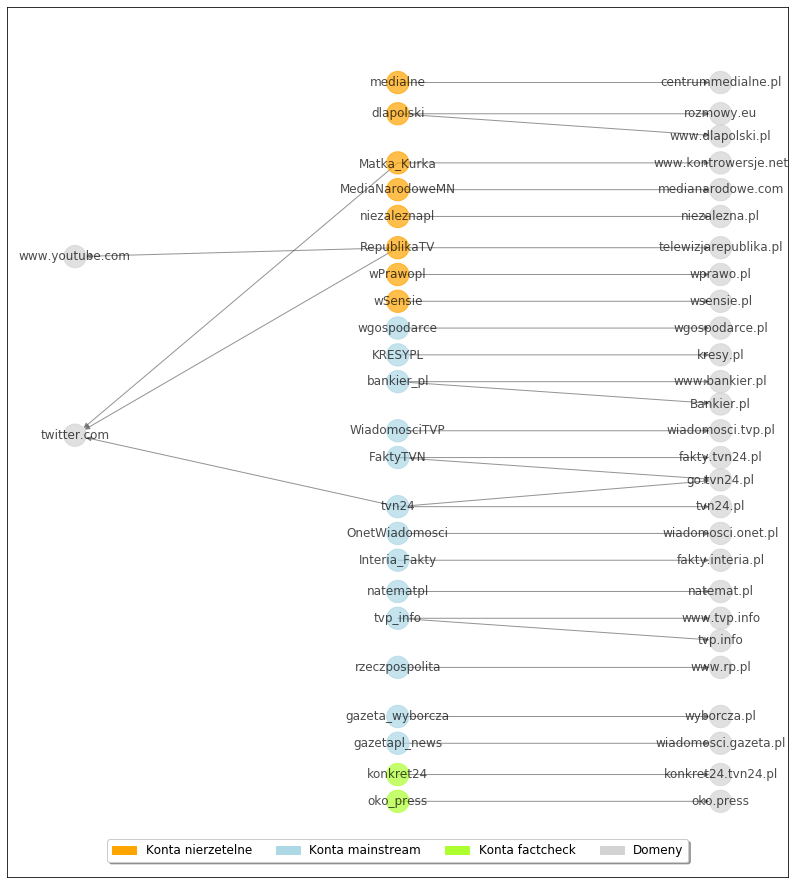

In [126]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.axis('off') 

plt.figure(figsize =(14, 16)) 

edge_width = [0.015 * G[u][v]['weight'] for u, v in G.edges()] 
# width of edge is a list of weight of edges 
for i, edge_w in enumerate(edge_width):
    if edge_w > 4:
        edge_width[i] = 2
    if edge_w <0.25:
        edge_width[i] = 0.25
        
# demonstrating circular layout 
nx.draw_networkx(G, pos, node_size=500,
                  node_color = color_map, 
                 alpha = 0.7,  
                 with_labels = True, 
#                   width = edge_width,  
                 edge_color ='.4') 
# Legend
junk_patch = mpatches.Patch(color='orange', label='Konta nierzetelne')
mainstream_patch = mpatches.Patch(color='lightblue', label='Konta mainstream')
factcheck_patch = mpatches.Patch(color='greenyellow', label='Konta factcheck')
other_patch = mpatches.Patch(color='lightgray', label='Domeny')
plt.legend(handles=[junk_patch, mainstream_patch, factcheck_patch, other_patch],
           fontsize=12,loc='upper center', bbox_to_anchor=(0.5, +0.05),
          fancybox=True, shadow=True, ncol=4)